# Project Milestone4_DSC540

In [1]:
#Name: Bhargava Gaggainpali
#Course: DSC 540 Data Preparation
#Title: Monroe County Crash Data

#Project Milestone 4 - API (Retrive Weather data using API request from JAN-1-2015 till DEC-31-2015)

In [2]:
# Import required Packages
import requests
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Assign the API URL to the variable
api_url = "https://visual-crossing-weather.p.rapidapi.com/history"


In [4]:
# define host and Key values for the api url
api_headers_host_key = {
    'x-rapidapi-host': "visual-crossing-weather.p.rapidapi.com",
    'x-rapidapi-key': "4dfabccb6fmshfc4569373e50986p1ecec0jsne82af4675a69"
    }

In [5]:
# defining the query string with the data and time for the requested period JAN-1-2015 till DEC-31-2015 for Monroe,MI,USA
api_querystring = {"dayStartTime":"0:0:00","dayEndTime":"0:0:00","aggregateHours":"24",
                    "startDateTime":"2015-01-01T00:00:00","endDateTime":"2015-12-31T00:00:00",
                   "contentType":"csv","shortColumnNames":"false","location":"Monroe,MI,USA","unitGroup":"us"}


In [6]:
# Call the api and save the respose in to a variable
return_response = requests.request("GET", api_url, headers=api_headers_host_key, params=api_querystring)


In [7]:
# print the respponse of the api
print(return_response)

<Response [200]>


In [8]:
# define a csv file to save the respose of the api call
api_response_csv_file = r'C:\BELLEVUE\DSC540\API_temp_file.csv'


In [9]:
# save the respose of the api call in to the csv file
with open(api_response_csv_file, 'w') as outfile:
    outfile.write(return_response.text)


In [10]:
# read the csv file data into dataframe
df_api_weather = pd.read_csv(api_response_csv_file)

In [11]:
# Retrive the number of rows and columns in data frame
df_api_weather.shape

(365, 25)

In [12]:
# list the columns in the dataframe
df_api_weather.columns


Index(['Address', 'Date time', 'Minimum Temperature', 'Maximum Temperature',
       'Temperature', 'Dew Point', 'Relative Humidity', 'Heat Index',
       'Wind Speed', 'Wind Gust', 'Wind Direction', 'Wind Chill',
       'Precipitation', 'Precipitation Cover', 'Snow Depth', 'Visibility',
       'Cloud Cover', 'Sea Level Pressure', 'Weather Type', 'Latitude',
       'Longitude', 'Resolved Address', 'Name', 'Info', 'Conditions'],
      dtype='object')

In [13]:
# print the data types of the columns
df_api_weather.dtypes


Address                 object
Date time               object
Minimum Temperature    float64
Maximum Temperature    float64
Temperature            float64
Dew Point              float64
Relative Humidity      float64
Heat Index             float64
Wind Speed             float64
Wind Gust              float64
Wind Direction         float64
Wind Chill             float64
Precipitation          float64
Precipitation Cover    float64
Snow Depth             float64
Visibility             float64
Cloud Cover            float64
Sea Level Pressure     float64
Weather Type           float64
Latitude               float64
Longitude              float64
Resolved Address        object
Name                    object
Info                   float64
Conditions              object
dtype: object

In [14]:
# print the first few lines of the dataframe
df_api_weather.head()

,Address,Date time,Minimum Temperature,Maximum Temperature,Temperature,Dew Point,Relative Humidity,Heat Index,Wind Speed,Wind Gust,...,Visibility,Cloud Cover,Sea Level Pressure,Weather Type,Latitude,Longitude,Resolved Address,Name,Info,Conditions
0,"Monroe,MI,USA",01/01/2015,17.5,30.2,23.8,10.7,57.59,NaN,21.8,29.9,...,9.9,31.5,NaN,NaN,41.9161,-83.3979,"Monroe, MI, United States","Monroe, MI, United States",NaN,Partially cloudy
1,"Monroe,MI,USA",01/02/2015,26.6,35.5,29.3,19.8,68.26,NaN,11.3,16.1,...,9.9,49.2,NaN,NaN,41.9161,-83.3979,"Monroe, MI, United States","Monroe, MI, United States",NaN,Partially cloudy
2,"Monroe,MI,USA",01/03/2015,26.6,35.5,32.7,30.9,92.89,NaN,9.1,NaN,...,3.8,83.3,NaN,NaN,41.9161,-83.3979,"Monroe, MI, United States","Monroe, MI, United States",NaN,"Rain, Overcast"
3,"Monroe,MI,USA",01/04/2015,21.2,37.3,31.8,29.4,90.94,NaN,22.9,32.0,...,6.0,99.3,NaN,NaN,41.9161,-83.3979,"Monroe, MI, United States","Monroe, MI, United States",NaN,"Rain, Overcast"
4,"Monroe,MI,USA",01/05/2015,8.5,19.4,11.3,3.3,69.70,NaN,27.5,32.2,...,8.8,71.0,NaN,NaN,41.9161,-83.3979,"Monroe, MI, United States","Monroe, MI, United States",NaN,Partially cloudy


In [15]:
# print the stats of the numerical columns in the dataframe
df_api_weather.describe()

,Minimum Temperature,Maximum Temperature,Temperature,Dew Point,Relative Humidity,Heat Index,Wind Speed,Wind Gust,Wind Direction,Wind Chill,Precipitation,Precipitation Cover,Snow Depth,Visibility,Cloud Cover,Sea Level Pressure,Weather Type,Latitude,Longitude,Info
count,365.000000,365.000000,365.000000,365.000000,365.000000,57.000000,365.000000,249.000000,365.000000,208.000000,365.000000,365.000000,0.0,365.000000,365.000000,6.000000,0.0,3.650000e+02,3.650000e+02,0.0
mean,40.788219,58.331507,49.701918,41.062192,74.177123,87.029825,13.531233,23.780723,157.110712,22.054327,0.084959,5.735753,NaN,8.751233,46.649315,1016.583333,NaN,4.191610e+01,-8.339790e+01,NaN
std,19.670714,20.815963,19.758043,19.633209,10.211498,4.898504,5.226471,6.606713,72.399144,18.222553,0.236582,12.500097,NaN,1.641338,31.182794,5.237334,NaN,2.561465e-13,5.692145e-14,NaN
min,-14.700000,4.100000,-2.400000,-14.500000,35.710000,80.500000,4.500000,10.300000,22.040000,-29.100000,0.000000,0.000000,NaN,0.800000,0.000000,1010.500000,NaN,4.191610e+01,-8.339790e+01,NaN
25%,28.300000,43.200000,35.700000,28.400000,68.090000,83.400000,9.300000,18.300000,89.920000,9.850000,0.000000,0.000000,NaN,8.100000,21.100000,1012.875000,NaN,4.191610e+01,-8.339790e+01,NaN
50%,43.600000,61.200000,52.100000,42.500000,75.280000,85.500000,12.700000,23.000000,153.420000,26.350000,0.000000,0.000000,NaN,9.600000,43.900000,1015.650000,NaN,4.191610e+01,-8.339790e+01,NaN
75%,57.100000,75.300000,66.800000,57.800000,81.070000,90.800000,16.700000,27.600000,220.210000,36.225000,0.020000,4.170000,NaN,9.900000,73.300000,1020.225000,NaN,4.191610e+01,-8.339790e+01,NaN
max,70.700000,90.900000,78.500000,70.700000,96.870000,98.600000,33.500000,52.600000,306.210000,48.600000,1.910000,91.670000,NaN,9.900000,100.000000,1024.000000,NaN,4.191610e+01,-8.339790e+01,NaN


In [16]:
# print the stats of the  categorical columns in the dataframe
print(df_api_weather.describe(include=['O']))

              Address   Date time           Resolved Address  \
count             365         365                        365   
unique              1         365                          1   
top     Monroe,MI,USA  08/26/2015  Monroe, MI, United States   
freq              365           1                        365   

                             Name        Conditions  
count                         365               365  
unique                          1                 6  
top     Monroe, MI, United States  Partially cloudy  
freq                          365               114  


In [17]:
# Checking the count of null values in each column
df_api_weather.isnull().sum()

Address                  0
Date time                0
Minimum Temperature      0
Maximum Temperature      0
Temperature              0
Dew Point                0
Relative Humidity        0
Heat Index             308
Wind Speed               0
Wind Gust              116
Wind Direction           0
Wind Chill             157
Precipitation            0
Precipitation Cover      0
Snow Depth             365
Visibility               0
Cloud Cover              0
Sea Level Pressure     359
Weather Type           365
Latitude                 0
Longitude                0
Resolved Address         0
Name                     0
Info                   365
Conditions               0
dtype: int64

In [18]:
# Selecting the few set of variables for the analysis
df_api = df_api_weather[['Address','Date time','Minimum Temperature','Maximum Temperature','Temperature','Wind Speed']]
df_api.shape


(365, 6)

In [19]:
# print the first few lines of the dataframe
df_api.head()

,Address,Date time,Minimum Temperature,Maximum Temperature,Temperature,Wind Speed
0,"Monroe,MI,USA",01/01/2015,17.5,30.2,23.8,21.8
1,"Monroe,MI,USA",01/02/2015,26.6,35.5,29.3,11.3
2,"Monroe,MI,USA",01/03/2015,26.6,35.5,32.7,9.1
3,"Monroe,MI,USA",01/04/2015,21.2,37.3,31.8,22.9
4,"Monroe,MI,USA",01/05/2015,8.5,19.4,11.3,27.5


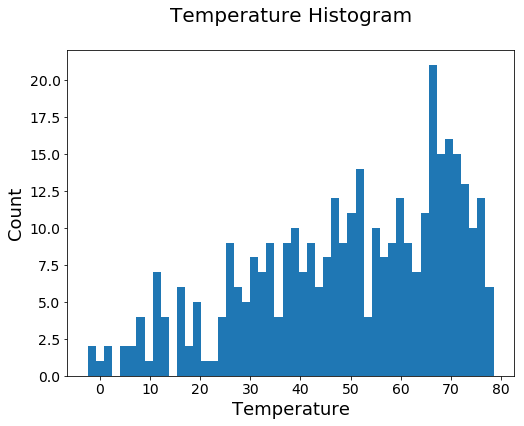

In [20]:
# Plot a histogram on the Temperature
ax=df_api['Temperature'].plot(kind='hist', bins=50, fontsize=14, figsize=(8,6))
ax.set_title('Temperature Histogram\n', fontsize=20)
ax.set_ylabel('Count', fontsize=18)
ax.set_xlabel('Temperature', fontsize=18);
plt.show()
    


In [21]:
df_api.dtypes

Address                 object
Date time               object
Minimum Temperature    float64
Maximum Temperature    float64
Temperature            float64
Wind Speed             float64
dtype: object

In [23]:
import sqlite3   # import sqlite3 package
conn = sqlite3.connect('DSC540_monroe_county.db')  # connect to database
c = conn.cursor()    # create an instance



In [24]:
# Create table - API
c.execute('''CREATE TABLE API(
[Address] TEXT,
[Date time] TEXT,
[Minimum Temperature] FLOAT,
[Maximum Temperature] FLOAT,
[Temperature] FLOAT,
[Wind Speed]  FLOAT
)''')   # Create table syntax
conn.commit()  # Commit the changes

In [25]:
import pandas as pd   # Import the package pandas
# load data from Dataframe to Table.
df_api.to_sql('API', conn, if_exists='append', index=False)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:2127: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  dtype=dtype)
